In [1]:
import sys
sys.path.append("../scripts/")
import pandas as pd
from generate_link_lists import all_content
import numpy as np

In [2]:
data = all_content("../resources/")
data["resources"][:3]

[{'authors': ['Elisabeth Kugler'],
  'name': 'Sharing Your Poster on Figshare: A Community Guide to How-To and Why',
  'proficiency_level': 'novice',
  'tags': ['Sharing', 'Research Data Management'],
  'type': ['Blog Post'],
  'url': 'https://focalplane.biologists.com/2023/07/26/sharing-your-poster-on-figshare/'},
 {'authors': ['Marcelo Zoccoler'],
  'license': 'CC-BY-4.0',
  'name': 'Running Deep-Learning Scripts in the BiA-PoL Omero Server',
  'proficiency_level': 'proficient',
  'tags': ['Python', 'Artificial Intelligence', 'Bioimage Analysis'],
  'type': ['Blog Post'],
  'url': 'https://biapol.github.io/blog/marcelo_zoccoler/omero_scripts/readme.html'},
 {'authors': ['Robert Haase'],
  'license': 'CC-BY-4.0',
  'name': 'Browsing the Open Microscopy Image Data Resource with Python',
  'proficiency_level': 'competent',
  'tags': ['OMERO', 'Python'],
  'type': ['Blog Post'],
  'url': 'https://biapol.github.io/blog/robert_haase/browsing_idr/readme.html'}]

In [3]:
authors = []
for d in data["resources"]:
    if "authors" in d.keys() and d["authors"] is not None:
        if isinstance(d["authors"], str):
            d["authors"] = [d["authors"]]
        authors.extend(d["authors"])
len(authors)

1517

In [4]:
for i in range(len(authors)):
    if "," in authors[i]:
        print(authors[i])
        temp = authors[i].split(",")
        authors[i] = temp[1] + " " + temp[0]

In [5]:
len(authors), len(np.unique(authors))

(1517, 895)

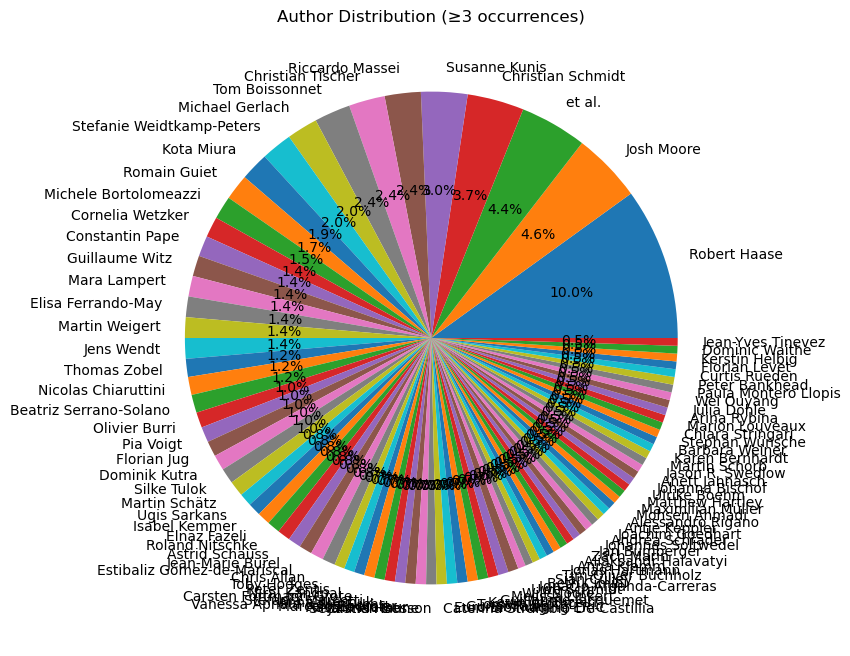

In [6]:
num_min_authorships = 3

import matplotlib.pyplot as plt

# Count author occurrences
author_counts = pd.Series(authors).value_counts()

# Filter authors with >=3 occurrences
author_counts = author_counts[author_counts >= num_min_authorships]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%')
plt.title(f'Author Distribution (≥{num_min_authorships} occurrences)')
plt.show()